In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [176]:
import sys
sys.executable

'c:\\ProgramData\\anaconda3\\python.exe'

In [177]:

def histdist(dataframe, column):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.distplot(dataframe[column])
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('distplot ' + column)

    plt.subplot(1, 2, 2)
    dataframe[column].hist(figsize=(15, 6))
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Histogram ' + column)

    plt.tight_layout()
    plt.show()


In [178]:

def stddf(dataframe, column, multiplier=3):
    print("Column Name:", column)

    u_b = dataframe[column].mean() + multiplier * dataframe[column].std()
    l_b = dataframe[column].mean() - multiplier * dataframe[column].std()
    print("Lower Boundary:", l_b)
    print("Upper Boundary:", u_b)

    lower_boundary = l_b
    upper_boundary = u_b

    outliers_below = dataframe[dataframe[column] < lower_boundary]
    outliers_above = dataframe[dataframe[column] > upper_boundary]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    dataframe.loc[dataframe[column] > u_b, column] = u_b
    dataframe.loc[dataframe[column] < l_b, column] = l_b


In [179]:


def skewcol(df, column_name):
    # Log Transform
    log_transformed = np.log(df[column_name])

    # Square Root Transform
    sqrt_transformed = np.sqrt(df[column_name])

    # Cube Root Transform
    cbrt_transformed = np.cbrt(df[column_name])

    # Calculate Skewness for each transformation
    original_skewness = df[column_name].skew()
    log_skewness = log_transformed.skew()
    sqrt_skewness = sqrt_transformed.skew()
    cbrt_skewness = cbrt_transformed.skew()

    # Display the skewness values
    print("Column name:- ",column_name)
    print("Original Data Skewness:", original_skewness)
    print("Log Transform Skewness:", log_skewness)
    print("Square Root Transform Skewness:", sqrt_skewness)
    print("Cube Root Transform Skewness:", cbrt_skewness)

In [180]:
df = pd.read_csv("./dataset/train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [181]:
df.shape


(614, 13)

In [182]:

df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [183]:

df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

----------------------------------
## Missing value treatment


In [184]:
# Female count is less so we will fill null values with Female
df.Gender = df.Gender.fillna("Female")

# "No" count is less so we will fill null values with "No"
df.Married = df.Married.fillna("No")

# "3+" count is less so we will fill null values with "3+"
df.Dependents = df.Dependents.fillna("3+")

# "Yes" count is less so we will fill null values with "Yes"
df.Self_Employed = df.Self_Employed.fillna("Yes")

# 12 count is less so we will fill null values with 12
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(12)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.median())

# 0.0 count is less so we will fill null values with 0.0
df.Credit_History = df.Credit_History.fillna(0.0)



In [185]:
df6=df["Loan_ID"]

df = df.drop(["Loan_ID"],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DataType conversion (categorical to numerical)

- label encoder

In [186]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [187]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Education', 'Married', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [188]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

------------------------
# Class Imbalance

In [189]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [190]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [191]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

XX = df.iloc[:, :-1]
YY = df.iloc[:, -1]

ab1 = RandomOverSampler(random_state=42)
x1, y1 = ab1.fit_resample(XX, YY)

x1.shape, y1.shape


((844, 11), (844,))

In [192]:
import pandas as pd

# Create a new DataFrame 'df' by combining 'x1' and 'y1'
df = pd.DataFrame(x1, columns=XX.columns)  # Assuming XX has column names
df['Loan_Status'] = y1  # Replace 'Target_Column' with the actual name of your target column

# Now 'df' contains both the features and the target variable


In [193]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [194]:
df.Loan_Status.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [195]:
df.shape

(844, 12)

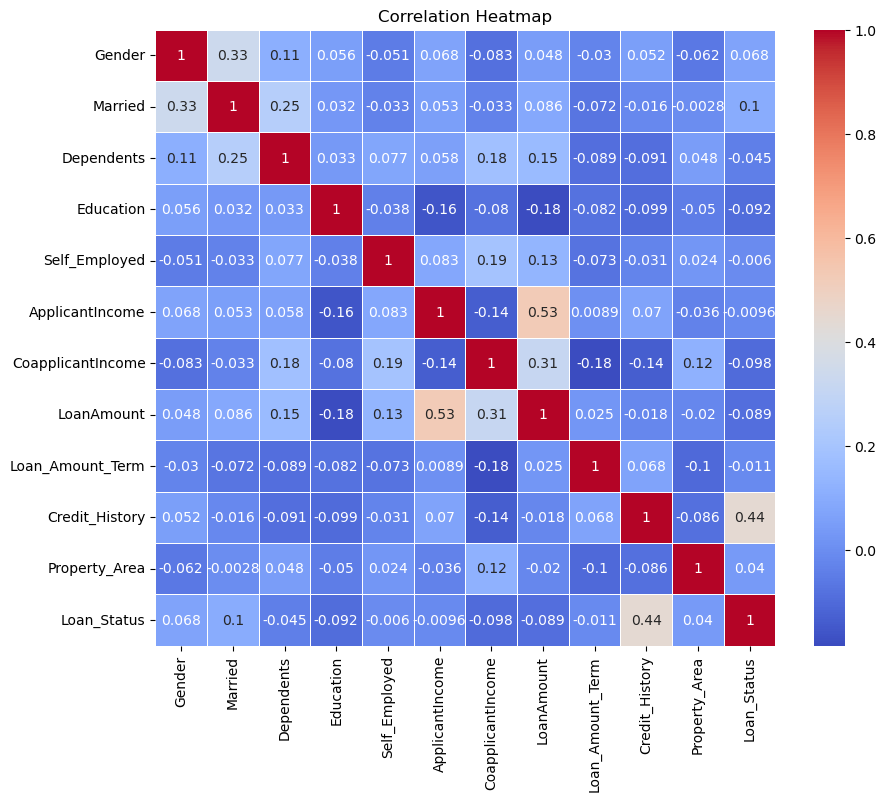

In [196]:
da1 = df.corr()
#da1
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

-------------------------------
## Outlier treatment

In [197]:
def iqrdf(dataframe, column, iqr_multiplier=3):
    IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
    print("IQR -", IQR)

    l_b = dataframe[column].quantile(0.25) - (IQR * iqr_multiplier)
    u_b = dataframe[column].quantile(0.75) + (IQR * iqr_multiplier)
    print("Lower Boundary: ", l_b)
    print("Upper Boundary: ", u_b)

    lower_boundary = l_b
    upper_boundary = u_b

    outliers_below = dataframe[dataframe[column] < lower_boundary]
    outliers_above = dataframe[dataframe[column] > upper_boundary]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    dataframe.loc[dataframe[column] > u_b, column] = u_b
    dataframe.loc[dataframe[column] < l_b, column] = l_b


<function matplotlib.pyplot.show(close=None, block=None)>

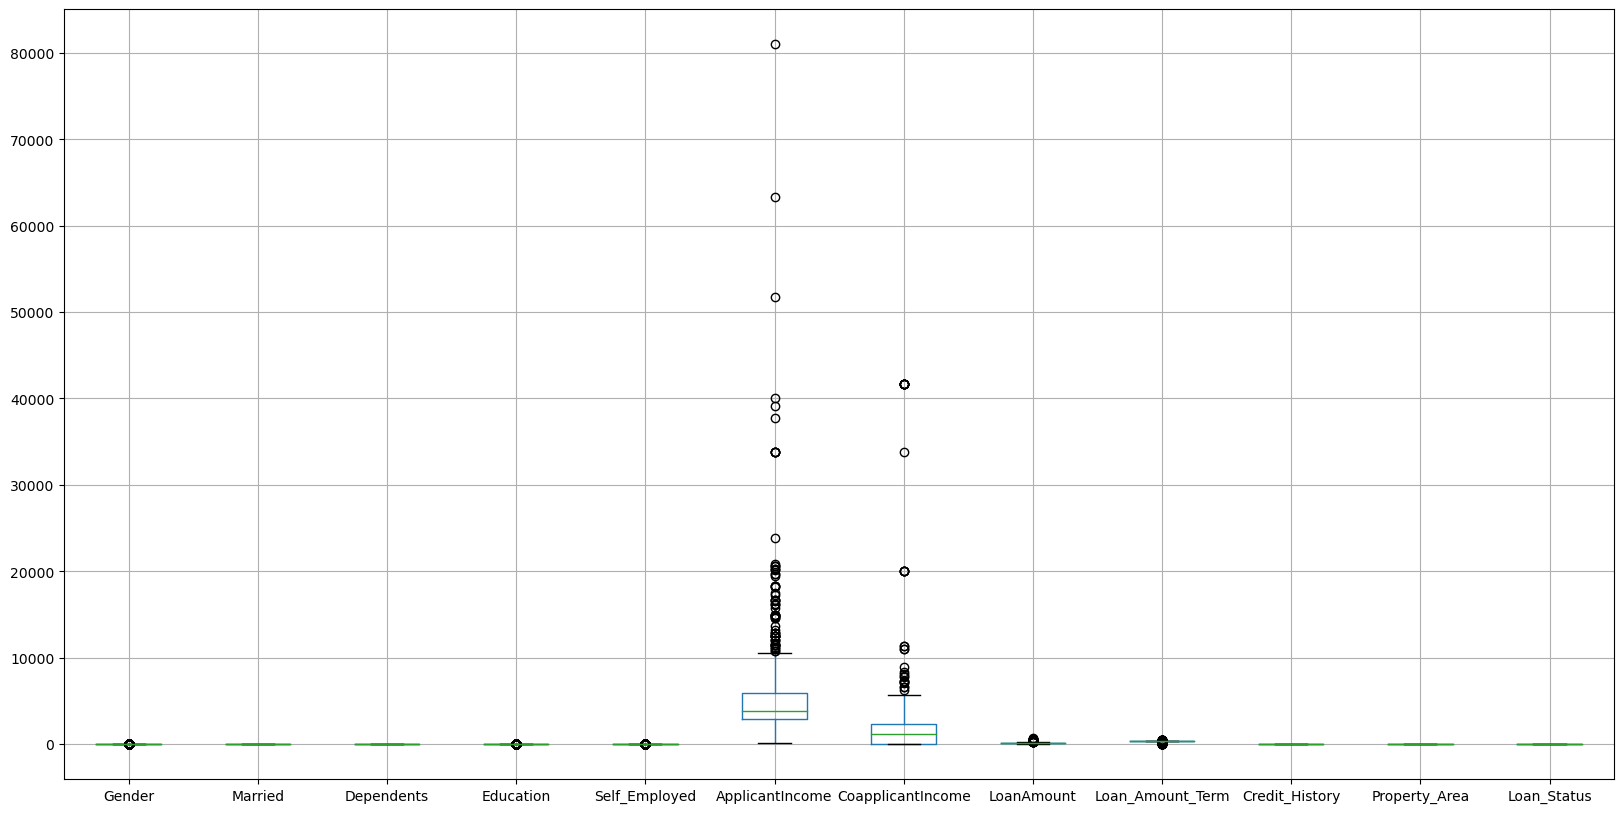

In [198]:
df.boxplot(figsize=(20,10))
plt.show

---------------------------
### ApplicantIncome column

<Axes: >

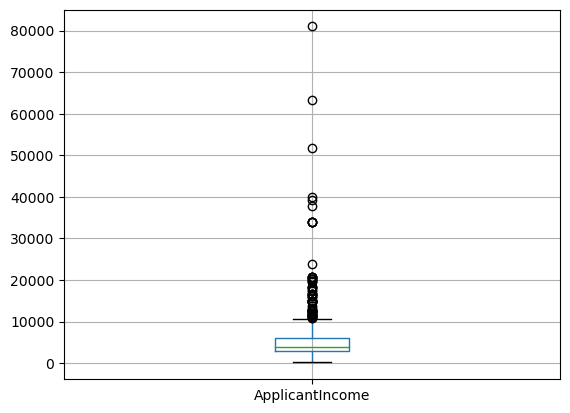

In [199]:
df.boxplot(column="ApplicantIncome")

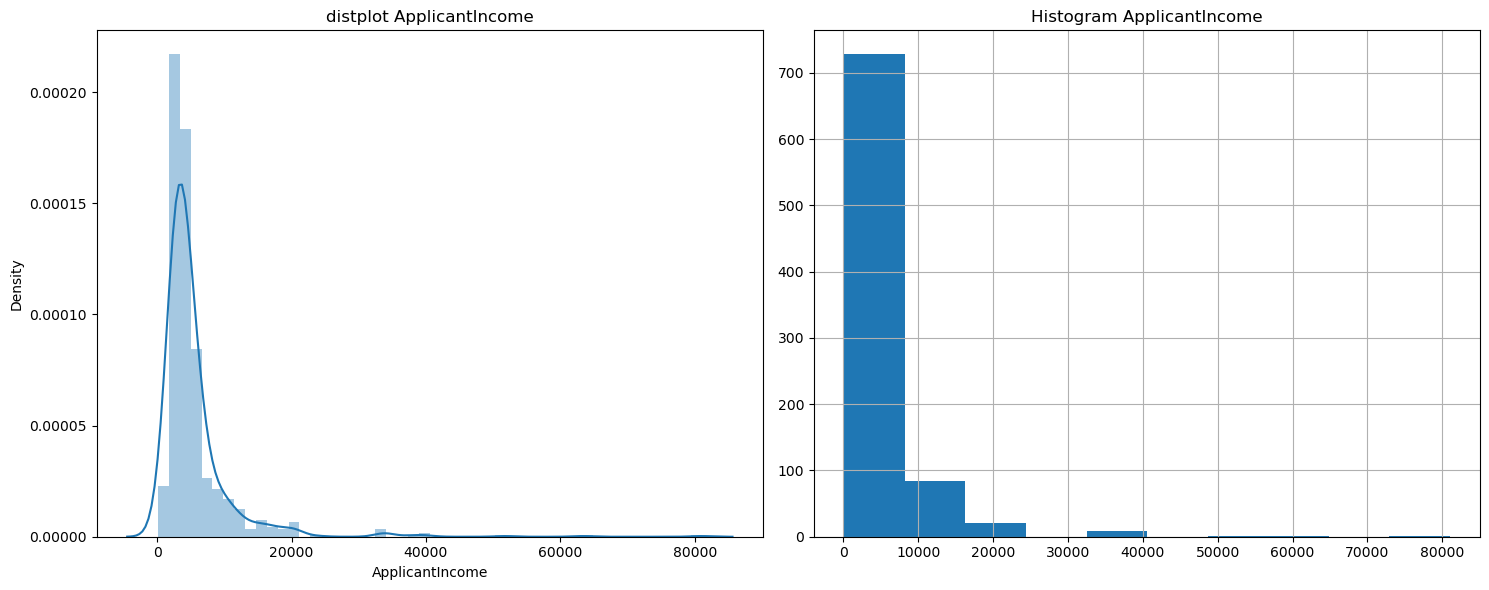

In [200]:
histdist(df,'ApplicantIncome')

In [201]:
iqrdf(df,'ApplicantIncome',iqr_multiplier=3)

IQR - 3055.5
Lower Boundary:  -6277.5
Upper Boundary:  15111.0
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 36


---------------------------
### LoanAmount column

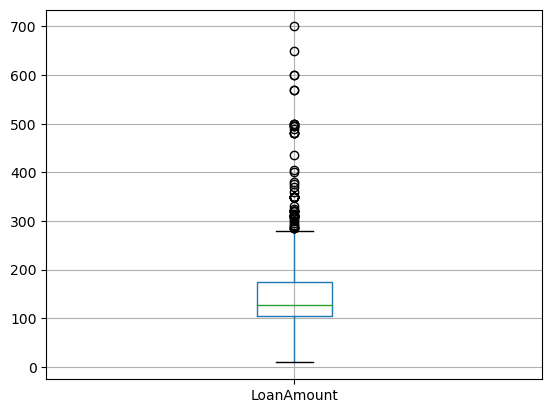

In [202]:
df.boxplot(column="LoanAmount")
plt.show()

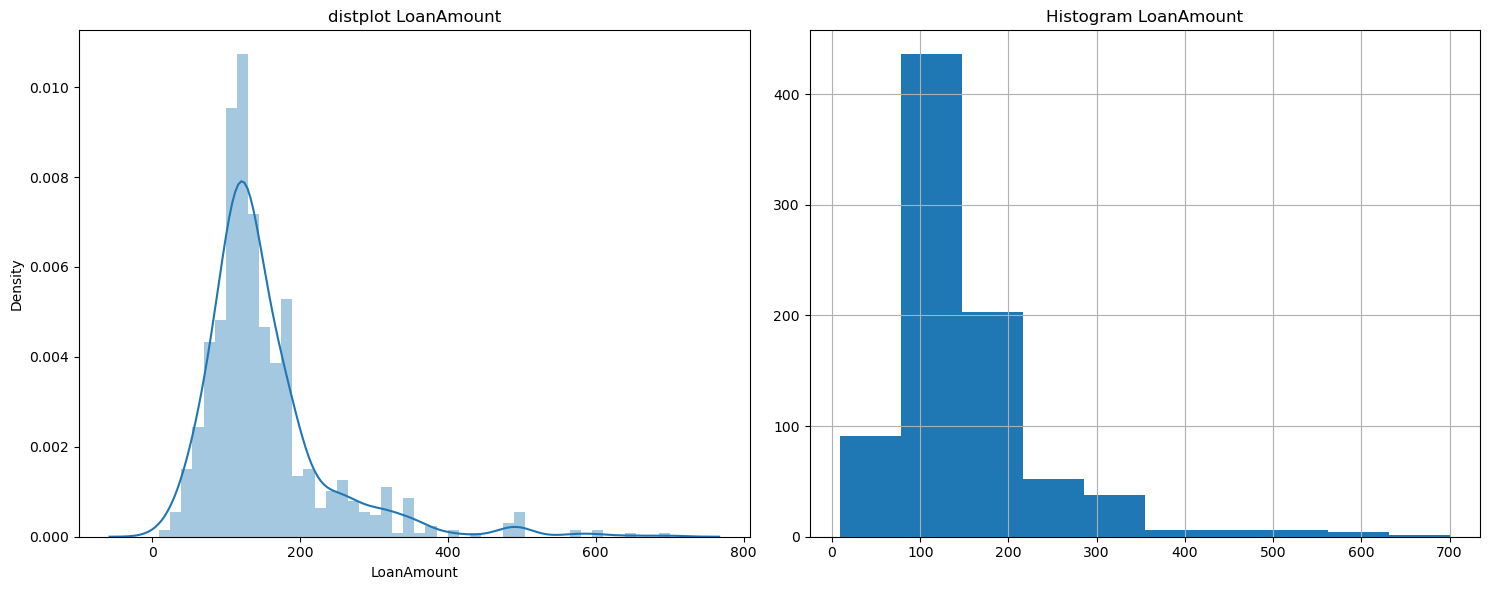

In [203]:
histdist(df,'LoanAmount')
plt.show()

In [204]:
iqrdf(df,'LoanAmount',iqr_multiplier=3)

IQR - 71.0
Lower Boundary:  -109.0
Upper Boundary:  388.0
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 20


---------------------------
### CoapplicantIncome column

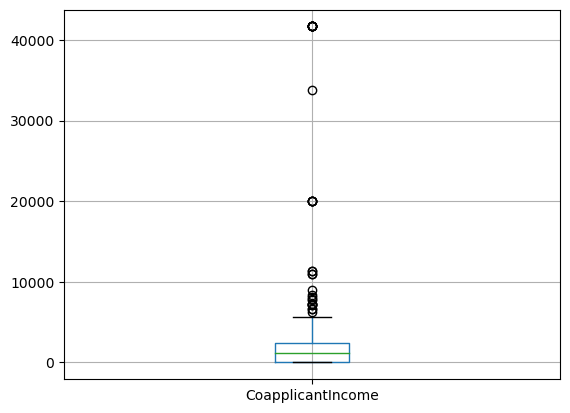

In [205]:
df.boxplot(column="CoapplicantIncome")
plt.show()

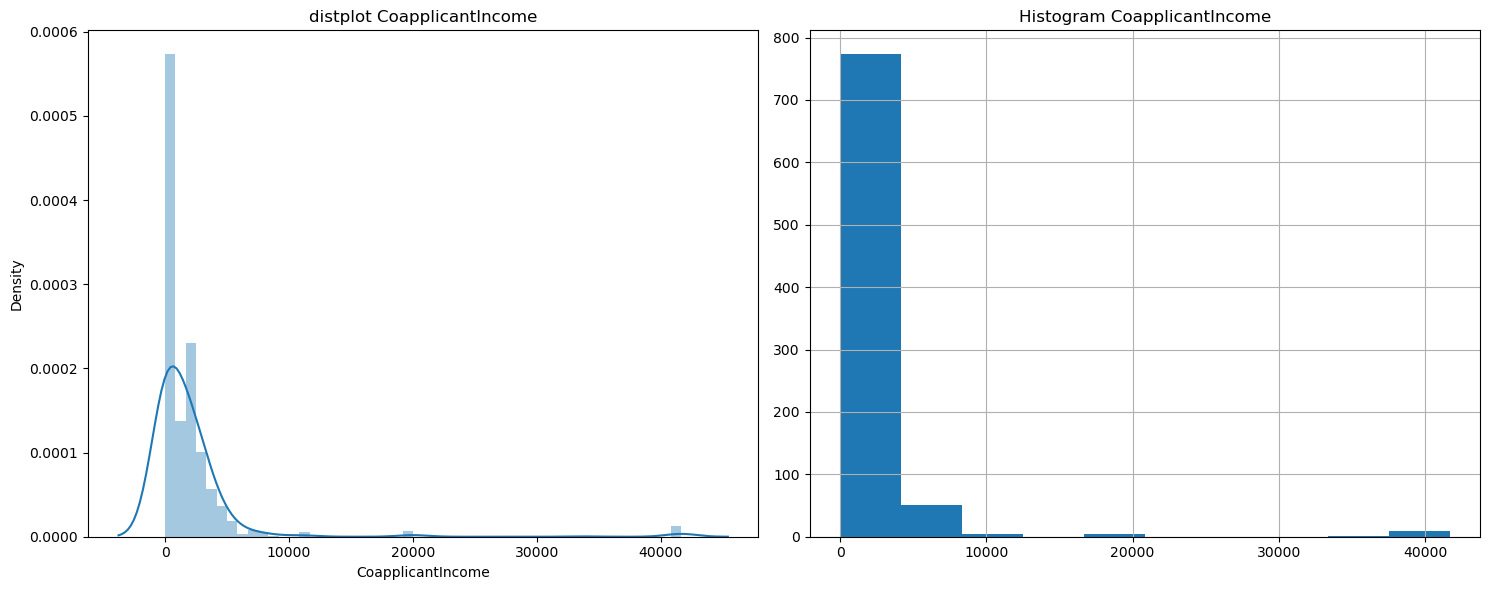

In [206]:
histdist(df,'CoapplicantIncome')
plt.show()

In [207]:
iqrdf(df,'CoapplicantIncome',iqr_multiplier=3)

IQR - 2359.75
Lower Boundary:  -7079.25
Upper Boundary:  9439.0
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 19


In [208]:
df["CoapplicantIncome"] = np.cbrt(df["CoapplicantIncome"])
df["LoanAmount"] = np.cbrt(df["LoanAmount"])

---------------------------
# splitting the data in to X & Y 

In [209]:
#splitting the data in to X & Y 
x=df.iloc[:,0:11]#[:,:-1]
x.head(2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.000000,5.039684,360.0,1.0,2
1,1,1,1,0,0,4583.0,11.467457,5.039684,360.0,1.0,0


In [210]:
y=df.iloc[:,11]#[:,-1]
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int32

In [211]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((675, 11), (169, 11), (675,), (169,))

In [212]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(xtrain, ytrain)


LogisticRegression()

In [213]:
lg_p = lg.predict(xtest)


In [214]:
lg_prob = lg.predict_proba(xtest)


In [215]:
from sklearn.metrics import confusion_matrix
lg_cf = confusion_matrix(ytest, lg_p)
lg_cf

array([[50, 42],
       [10, 67]], dtype=int64)

In [216]:
# Calculate accuracy
log_acc = (lg_cf.diagonal().sum() / lg_cf.sum()) * 100
log_acc

69.23076923076923

In [217]:

from sklearn.metrics import classification_report
print(classification_report(ytest, lg_p))


              precision    recall  f1-score   support

           0       0.83      0.54      0.66        92
           1       0.61      0.87      0.72        77

    accuracy                           0.69       169
   macro avg       0.72      0.71      0.69       169
weighted avg       0.73      0.69      0.69       169



In [218]:

df1=pd.DataFrame(lg_prob)
df1


,0,1
0,0.202900,0.797100
1,0.616940,0.383060
2,0.877274,0.122726
3,0.794054,0.205946
4,0.234551,0.765449
...,...,...
164,0.380264,0.619736
165,0.470527,0.529473
166,0.313298,0.686702
167,0.816833,0.183167


In [219]:

#AUC-ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc=roc_auc_score(ytest,lg_prob[:, 1])
roc


0.7396950875211745

In [220]:
fpr,tpr,threshold=roc_curve(ytest,lg_prob[:,1])

#plt.plot(fpr,tpr)

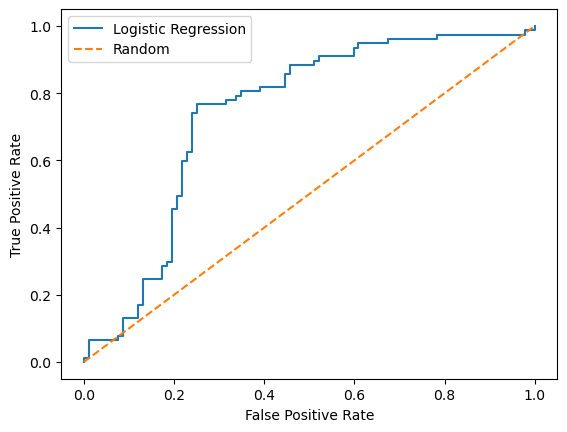

In [221]:
# Plot the ROC curve with labels and legend
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

-----------------------------------
### Random Forest

---------------------------
### Decision tree

In [222]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)

dt_p = dt.predict(xtest)
#print("Predictions of decision tree are :-",dt_p)
print("-" * 50)

dt.feature_importances_
print("-" * 50)
dt_cf = confusion_matrix(dt_p,ytest)
print("Confusion matrix of decision tree is :-\n", dt_cf)

print("-" * 50)

dt_acc = dt_cf.diagonal().sum()/dt_cf.sum()*100
print("Accuracy of decision tree is :-",dt_acc)

print("-" * 50)

from sklearn.metrics import classification_report

print(classification_report(dt_p,ytest))

--------------------------------------------------
--------------------------------------------------
Confusion matrix of decision tree is :-
 [[77 16]
 [15 61]]
--------------------------------------------------
Accuracy of decision tree is :- 81.65680473372781
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        93
           1       0.79      0.80      0.80        76

    accuracy                           0.82       169
   macro avg       0.81      0.82      0.81       169
weighted avg       0.82      0.82      0.82       169



--------------------------
### KNN

In [223]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(xtrain, ytrain)

knn_p = knn.predict(xtest)

print("=" * 50)

knn_cf = confusion_matrix(knn_p, ytest)
print("Confusion matrix of KNN is :-\n", knn_cf)

print("=" * 50)

knn_acc = knn_cf.diagonal().sum() / knn_cf.sum() * 100
print("Accuracy of KNN is :-", knn_acc)

print("=" * 50)

print(classification_report(knn_p, ytest))


Confusion matrix of KNN is :-
 [[62 42]
 [30 35]]
Accuracy of KNN is :- 57.396449704142015
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       104
           1       0.45      0.54      0.49        65

    accuracy                           0.57       169
   macro avg       0.56      0.57      0.56       169
weighted avg       0.59      0.57      0.58       169



In [224]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)

xgb_p = xgb.predict(xtest)

xgb_cf = confusion_matrix(xgb_p,ytest)


print("Confusion matrix of XGB is :-\n", xgb_cf)

print("=" * 50)

xgb_acc = xgb_cf.diagonal().sum()/xgb_cf.sum()*100
print("Accuracy of XGB is :-", xgb_acc)

print("=" * 50)

print(classification_report(knn_p, ytest))

Confusion matrix of XGB is :-
 [[76 15]
 [16 62]]
Accuracy of XGB is :- 81.65680473372781
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       104
           1       0.45      0.54      0.49        65

    accuracy                           0.57       169
   macro avg       0.56      0.57      0.56       169
weighted avg       0.59      0.57      0.58       169



In [225]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain, ytrain)

rf_p = rf.predict(xtest)

print("=" * 50)

rf.feature_importances_

print("=" * 50)

rf_cf = confusion_matrix(rf_p, ytest)
print("Confusion matrix of random forest is :-\n", rf_cf)

print("=" * 50)

rf_acc = rf_cf.diagonal().sum() / rf_cf.sum() * 100
print("Accuracy of random forest is :-", rf_acc)

print("=" * 50)

from sklearn.metrics import classification_report

print(classification_report(rf_p, ytest))


Confusion matrix of random forest is :-
 [[77  7]
 [15 70]]
Accuracy of random forest is :- 86.98224852071006
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        84
           1       0.91      0.82      0.86        85

    accuracy                           0.87       169
   macro avg       0.87      0.87      0.87       169
weighted avg       0.87      0.87      0.87       169



In [226]:
import pandas as pd

# Load the actual test data
test_df = pd.read_csv("./dataset/test_lAUu6dG.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [227]:
# Female count is less so we will fill null values with Female
test_df.Gender = test_df.Gender.fillna("Female")

# "No" count is less so we will fill null values with "No"
test_df.Married = test_df.Married.fillna("No")

# "3+" count is less so we will fill null values with "3+"
test_df.Dependents = test_df.Dependents.fillna("3+")

# "Yes" count is less so we will fill null values with "Yes"
test_df.Self_Employed = test_df.Self_Employed.fillna("Yes")

# 12 count is less so we will fill null values with 12
test_df.Loan_Amount_Term = test_df.Loan_Amount_Term.fillna(12)

test_df.LoanAmount = test_df.LoanAmount.fillna(test_df.LoanAmount.median())

# 0.0 count is less so we will fill null values with 0.0
test_df.Credit_History = test_df.Credit_History.fillna(0.0)



In [228]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Education', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']
le = LabelEncoder()

for column in columns_to_encode:
    test_df[column] = le.fit_transform(test_df[column])

In [229]:
test_df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [230]:
Loan_ID=test_df["Loan_ID"]

test_df = test_df.drop(["Loan_ID"],axis=1)
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [234]:
test_predictions = rf.predict(test_df)

# Map predictions to 'Y' and 'N'
test_predictions = ['Y' if prediction == 1 else 'N' for prediction in test_predictions]

# Create a DataFrame for predictions with Loan_ID
predictions_df = pd.DataFrame({"Loan_ID": Loan_ID, "Loan_Status": test_predictions})

# Save the predictions to a CSV file
predictions_df.to_csv("test_predictions.csv", index=False)

In [235]:
predictions_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
